In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
dataset = pd.read_json("D:/Stella/Documents/10_Academy/Twitter-Data-Analysis/data/covid19.json",lines=True)
dataset.head(2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries
0,2021-06-18 17:55:49+00:00,1405947374003015684,1405947374003015680,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,2021-06-18 17:55:49.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-06-18 17:55:59+00:00,1405947412364075010,1405947412364075008,RT @globalhlthtwit: Dr Moeti is head of WHO in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,2021-06-18 17:55:59.004,1.405895e+18,1.405895e+18,{'created_at': 'Fri Jun 18 14:27:42 +0000 2021...,"{'url': 'https://t.co/sOgIroihOc', 'expanded':...",NaN,NaN,NaN,NaN,NaN


In [3]:
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from gensim.utils import SaveLoad
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from re import sub
import pyLDAvis.gensim_models as gensimvis
from collections import Counter
from gensim.matutils import corpus2csc, sparse2full, corpus2dense
from wordcloud import WordCloud
from sklearn.utils import resample

C:\Users\Stella\Anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [4]:
#Functions for data cleaning
wnl = WordNetLemmatizer()

def removePunc(myWord):
    """Function to remove punctuation from string inputs"""
    if myWord is None:
        return myWord
    else:
        return sub('[.:;()/!&-*@$,?^\d+]','',myWord)
        
def removeAscii(myWord):
    """Function to remove ascii from string input"""
    if myWord is None:
        return myWord
    else:
        return str(sub(r'[^\x00-\x7F]+','', myWord.strip()))

def lemmatize(myWord):
    """Function to lemmatize words"""
    if myWord is None:
        return myWord
    else:
        return str(wnl.lemmatize(myWord))

def removeStopWords(myWord):
    """Function to remove stop words"""
    if myWord is None:
        return myWord
    if myWord not in str(stopwords.words('english')):
        return myWord

def removeLinkUser(myWord):
    """Function to remove web addresses and twitter handles"""
    if not myWord.startswith('@') and not myWord.startswith('http'):
        return myWord

def prepText(myWord):
    """Final text pre-processing function"""
    return removeStopWords(
        lemmatize(
            removeAscii(
                removePunc(
                    removeLinkUser(
                        myWord.lower()
                    )
                )
            )
        )
    )

<>:9: DeprecationWarning: invalid escape sequence \d
<>:9: DeprecationWarning: invalid escape sequence \d
<>:9: DeprecationWarning: invalid escape sequence \d
<ipython-input-4-6217259fa9ee>:9: DeprecationWarning: invalid escape sequence \d
  return sub('[.:;()/!&-*@$,?^\d+]','',myWord)


In [5]:
def filterTweetList(tweetList):
    """Remove stop words, lemmatize, and clean all tweets"""
    return [[prepText(word) for word
                in tweet.split()
                    if prepText(word) is not None]
                for tweet in tweetList]

In [6]:
cleanTweetList = filterTweetList(dataset['text'])

In [7]:
cleanTweetList 

[['africa',
  '"in',
  'midst',
  'full-blown',
  'third',
  'wave"',
  'coronavirus',
  'head',
  'warned',
  'case',
  'risen'],
 ['dr',
  'moeti',
  'head',
  'africa',
  'one',
  'best',
  'public',
  'health',
  'expert',
  'leader',
  'know',
  'desperate'],
 ['thank',
  'creating',
  'amazing',
  'campaign',
  'amp',
  'turning',
  'social',
  'medium',
  '#redresearch',
  'today'],
 ['former',
  'pfizer',
  'vp',
  'virologist',
  'dr',
  'michael',
  'yeadon',
  'one',
  'credentialed',
  'medical',
  'professional',
  'speaking'],
 ['think',
  'important',
  'dont',
  'sell',
  'covax',
  'short',
  'still',
  'lot',
  'going',
  'innovative',
  'design'],
 ['pleased',
  'welcome',
  '#wecandothis',
  'bus',
  'atlanta',
  'today',
  'remember',
  'easy',
  'way',
  'find',
  '#covid',
  'vaccine'],
 ['yet',
  'another',
  'amazingly',
  'qualified',
  'courageous',
  'doctor',
  'roger',
  'hodkinson',
  'speaks',
  'crazy',
  'government',
  'policy'],
 ['yet',
  'another',

In [8]:
dataset['clean_text'] = cleanTweetList
dataset.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries,clean_text
0,2021-06-18 17:55:49+00:00,1405947374003015684,1405947374003015680,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[africa, ""in, midst, full-blown, third, wave"",..."
1,2021-06-18 17:55:59+00:00,1405947412364075010,1405947412364075008,RT @globalhlthtwit: Dr Moeti is head of WHO in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,1.405895e+18,1.405895e+18,{'created_at': 'Fri Jun 18 14:27:42 +0000 2021...,"{'url': 'https://t.co/sOgIroihOc', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[dr, moeti, head, africa, one, best, public, h..."
2,2021-06-18 17:56:07+00:00,1405947447797587969,1405947447797587968,RT @NHSRDForum: Thank you @research2note for c...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,1.405884e+18,1.405884e+18,{'created_at': 'Fri Jun 18 13:44:53 +0000 2021...,"{'url': 'https://t.co/q5vWPPUnM7', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[thank, creating, amazing, campaign, amp, turn..."
3,2021-06-18 17:56:10+00:00,1405947462028873729,1405947462028873728,RT @HighWireTalk: Former Pfizer VP and Virolog...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[former, pfizer, vp, virologist, dr, michael, ..."
4,2021-06-18 17:56:20+00:00,1405947503225229317,1405947503225229312,RT @PeterHotez: I think it’s important that we...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,1.405860e+18,1.405860e+18,{'created_at': 'Fri Jun 18 12:07:28 +0000 2021...,"{'url': 'https://t.co/DGvCaXmWfI', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[think, important, dont, sell, covax, short, s..."


In [9]:
#dataset.to_csv("D:/Stella/Documents/10_Academy/Twitter-Data-Analysis/data/covid191.csv")

In [10]:
dataset['liststring'] = [','.join(map(str, l)) for l in dataset['clean_text']]
dataset.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries,clean_text,liststring
0,2021-06-18 17:55:49+00:00,1405947374003015684,1405947374003015680,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[africa, ""in, midst, full-blown, third, wave"",...","africa,""in,midst,full-blown,third,wave"",corona..."
1,2021-06-18 17:55:59+00:00,1405947412364075010,1405947412364075008,RT @globalhlthtwit: Dr Moeti is head of WHO in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,1.405895e+18,{'created_at': 'Fri Jun 18 14:27:42 +0000 2021...,"{'url': 'https://t.co/sOgIroihOc', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[dr, moeti, head, africa, one, best, public, h...","dr,moeti,head,africa,one,best,public,health,ex..."
2,2021-06-18 17:56:07+00:00,1405947447797587969,1405947447797587968,RT @NHSRDForum: Thank you @research2note for c...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,1.405884e+18,{'created_at': 'Fri Jun 18 13:44:53 +0000 2021...,"{'url': 'https://t.co/q5vWPPUnM7', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[thank, creating, amazing, campaign, amp, turn...","thank,creating,amazing,campaign,amp,turning,so..."
3,2021-06-18 17:56:10+00:00,1405947462028873729,1405947462028873728,RT @HighWireTalk: Former Pfizer VP and Virolog...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[former, pfizer, vp, virologist, dr, michael, ...","former,pfizer,vp,virologist,dr,michael,yeadon,..."
4,2021-06-18 17:56:20+00:00,1405947503225229317,1405947503225229312,RT @PeterHotez: I think it’s important that we...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,1.405860e+18,{'created_at': 'Fri Jun 18 12:07:28 +0000 2021...,"{'url': 'https://t.co/DGvCaXmWfI', 'expanded':...",NaN,NaN,NaN,NaN,NaN,"[think, important, dont, sell, covax, short, s...","think,important,dont,sell,covax,short,still,lo..."


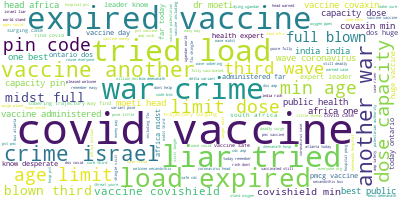

In [11]:
# Join the different processed titles together.
long_string = ','.join(list(dataset['liststring'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()